# Allen Institute
## 01_preprocess
---
## Before you start
- run `make init` cmd in your local env

## WorkFlow
- make configuration
    - a) Normalization
    - b) Formation of datasets for ML
        - Undersampling
        - Data splitting
        - Visualization
        - Format matrix for GBDT
        - c) export
    - d) Formation of a dataset for visualization
        - feature extraction
        - Format matrix for visualization
 
 
 **Notes)**
 
 if kernel dies during running codes, you can ommit completed sections indexed if alphabets

In [12]:
import glob
import json
import os
import random
from typing import Dict, List, NamedTuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse as sp
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GroupShuffleSplit
from tqdm.notebook import tqdm

from tools.figure import countplot, cns_subtype_markers, fig_kwarg
from tools.preprocess import fmt_rpm,fmt_table, find
import tools.spongy_panda as spd

In [22]:
class Config(NamedTuple):
    files: List[str] = glob.glob("../data/m1_10x/matrix*")[1:]
    data_dir: str = "../data/m1_10x_rpm"
    save_dir: str = "../out/m1_10x/01_preprocess"
    fig_kwarg: Dict[str, Union[str, int, float]] = fig_kwarg
    save_file: bool = False
conf = Config(save_file=True)

In [3]:
os.makedirs(conf.data_dir, exist_ok=True)
os.makedirs(conf.save_dir, exist_ok=True)

---
## a) Normalization
## $Counts\rightarrow \log_2(RPM+1)$
- 1. make `../datam1_10x_rpm` to save file/files
- 2. export

In [ ]:
fmt_rpm(conf.files, conf.data_dir, log2=True)

- as there are no mitochondrial genes in this dataset, QC will be omitted

---
## Format matrix for GBDT (referential data)
## $\log_2(RPM+1)\rightarrow \log_2(RPM+1)$
- 1. set configuration
- 2. make `../datam1_10x_processed` to save files
- 3. get submatrix
- 4. split data
- 5. export training/test data

In [9]:
conf = Config(
    files=glob.glob("../data/m1_10x_rpm/*"),
    save_dir="../data/m1_10x_ml"
)

In [10]:
os.makedirs(conf.save_dir, exist_ok=True)

In [11]:
df = fmt_table(
    l_data=conf.files,
    save_dir=conf.save_dir,
    filenames="resampled_whole_log",
    rownames=res.index,
    save_as_csv=True
)

extraction:   0%|          | 0/39 [00:00<?, ?it/s]

removing artifacts:   0%|          | 0/39 [00:00<?, ?it/s]

---
## Feature extraction 

In [95]:
class Config(NamedTuple):
    files: List[str] = glob.glob("../data/m1_10x_rpm/*")
    feat: List[str] = cns_subtype_markers
    create_new_json: bool = False
    json_path: str = "../data/gene_list.json"
    data_idx: str = "m1_10x"
    fig_kwarg: Dict[str, Union[str, int, float]] = fig_kwarg
    save_dir: str =  "../data/m1_10x_viz"
    save_file: bool = False

In [33]:
conf = Config(create_new_json = False)

In [34]:
os.makedirs(conf.save_dir, exist_ok=True)

In [35]:
gene_list = open(conf.files[0]).readline().split(",")[1:]

if not conf.create_new_json:
    with open(conf.json_path, mode="r") as f:
        dicts = json.load(f)
        dicts = dicts if conf.data_idx in dicts\
            else {conf.data_idx: gene_list, **dicts}
    
with open(conf.json_path, mode="w") as f:
    dicts = {conf.data_idx: gene_list} if conf.create_new_json else dicts
    json.dump(dicts, f)

In [36]:
# utils.preprocess.find returns a list of missing genes

find(gene_list, conf.feat)

[]

### Format csv

In [37]:
df = fmt_table(
    conf.files, conf.save_dir,
    "orig_markers+_log",
    colnames=conf.feat,
    save_as_csv=True
)

extraction:   0%|          | 0/39 [00:00<?, ?it/s]

removing artifacts:   0%|          | 0/39 [00:00<?, ?it/s]

In [39]:
df.head()

,HES5,NFIA,LHX8,NES,GLUL,PTPRC,PROX1,SIX3,POU3F3,TBR1,...,PECAM1,RBFOX3,TYMS,AQP4,TTYH1,PCNA,PYGB,OLIG2,S100B,DCX
$\log_2(RPM+1)$,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGATTTCC-LKTX_190129_01_A01,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,8.123371,0.0,0.0,0.000000,0.0,7.710057,0.0,0.0,0.000000
AAACCCAAGTATGGCG-LKTX_190129_01_A01,0.0,7.386229,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,8.381911,0.0,0.0,6.394827,0.0,0.000000,0.0,0.0,6.394827
AAACCCACAAAGTGTA-LKTX_190129_01_A01,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,8.544552,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,5.978780
AAACCCACACTACTTT-LKTX_190129_01_A01,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
AAACCCACAGTGAGCA-LKTX_190129_01_A01,0.0,7.594203,0.0,0.0,8.590465,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,7.594203,0.0,0.000000,0.0,0.0,0.000000


In [40]:
df.to_pickle(f"{conf.save_dir}/orig_markers+_log.pkl")

---
## b) Undersampling
- make every class in metadata has even sample  sizes

In [41]:
idx = pd.read_csv("../data/m1_10x_meta/metadata.csv", index_col=0)

In [42]:
df_mock = pd.DataFrame(
    np.arange(len(idx)),
    index=idx.class_label,
    columns = ["n_idx"]
)

In [43]:
data, label_mock = RandomUnderSampler(random_state=0).fit_resample(df_mock, idx.class_label)

In [44]:
res = idx.iloc[data.n_idx]

---
## Data Spliting 
- decomposition
- clustering
- split into training/test data by group shuffle split

### generate group with PCA and KMeans
- split into 500 clusters

In [96]:
conf = Config(
    files=glob.glob("../data/m1_10x_rpm/*"),
    save_dir="../data/m1_10x_ml",
    save_file=True
)

In [51]:
os.makedirs(conf.save_dir, exist_ok=True)

In [54]:
df_pca = PCA(random_state=0, n_components="mle").fit_transform(df.loc[res.index, :])

In [59]:
k_means = KMeans(n_clusters=500, random_state=0).fit_predict(df_pca)

In [77]:
(train_idx, test_idx), _ = GroupShuffleSplit(
    n_splits=2, test_size=.2, random_state=0
).split(res, res, k_means)

In [84]:
with open(f"../data/m1_10x_sample_separation.json", mode="w") as f:
    dicts = {
        name: data.index.to_list() for name, data in zip(
            ["train", "test"], 
            [res.iloc[train_idx, :], res.iloc[test_idx, :]]
        )
    }
    json.dump(dicts, f)

---
## Visualization

In [90]:
trainy, testy = res.iloc[train_idx, :], res.iloc[test_idx, :]

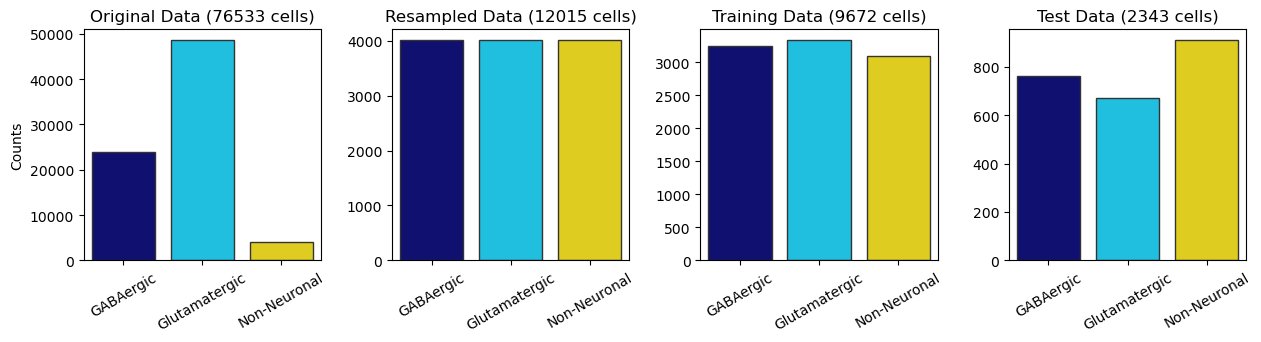

In [97]:
fig, ax = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=0.3)

ticklabel = res.sort_values("class_label").class_label.unique()

for (i, v), title in zip(
    enumerate([idx, res, trainy, testy]),
    ["Original Data", "Resampled Data", "Training Data", "Test Data"]
):
    label = idx.loc[v.index, :].sort_values("class_label").class_label
    
    countplot(data=v, label=label, cmap="jet", ax=ax[i])
    ax[i].set_xticklabels(ticklabel, rotation=30)
    ax[i].set_ylabel("Counts" if i == 0 else "")
    ax[i].set(title=f"{title} ({len(v)} cells)")

if conf.save_file:
    plt.savefig(f"../out/m1_10x/01_preprocess/counts.png", **conf.fig_kwarg)

In [98]:
if f"{conf.save_dir}/resampled_whole_log.csv" in glob.glob(f"{conf.save_dir}/*"):
    df = pd.read_csv(f"{conf.save_dir}/resampled_whole_log.csv", index_col=0)

In [99]:
for name, data in tqdm(
    zip(["train", "test"], [trainy, testy]),
    desc="Exporting", total=2
):
    df.loc[data.index, :].to_csv(f"{conf.save_dir}/{name}_whole_log.csv", index=True)
    df.loc[data.index, :].to_pickle(f"{conf.save_dir}/{name}_whole_log.pkl")

Exporting:   0%|          | 0/2 [00:00<?, ?it/s]